# Machine Learning (laboratory instruction)
## Logistic regression

### Submission

<u>Submission:</u>

Compress all files into **single zip** archive and submit via Wikamp. See below the content of the archive (replace the `name` and `surname` with proper values):
```
📂 name.surname.zip
+-- 📜 04-Logistic regression.ipynb
+-- 📜 device.npz
```

<u>Grades</u>

| Percentage of all points | mark |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Penalties</u>

* `mark - 0.5` if tasks are submitted after laboratory (but less than 7 days); 
* `mark - 1` if tasks are submitted after one week (>=7 days but < 14 days);
* `mark - 1.5` if tasks are submitted later than two weeks (>=14 days).

<u>Warning:</u>

It is NOT allowed to share your .ipynb file with other students nor Internet. All students should download the exercise files directly from WIKAMP. Group work is considered as plagiarism.

<u>Plagiarism Disclaimer:</u>

I hereby declare that this exercise is my own and autonomous work. I am aware of the consequences and I am familiar with the university regulations.

### The goal
Apply Logistic regression algorithm to classification problem.


### Task 1. Read the dataset from file (*0 points*).

Read the dataset from file. 
This is a dataset that contains information read from sensors of cars' devices. The value 0 indicates that all the devices are original, and 1 means that at least one of the devices was replaced (not authorized).

**Tip**: You can use below code to read the data:

```python
with open('device.npz', 'rb') as f:
    data = np.load(f)
    x, y = data['x'], data['y']
    
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.5, random_state=123, shuffle=True)  
```




In [59]:
# >>> WRITE YOUR CODE BELOW <<<
import numpy as np
from sklearn import *

with open('device.npz', 'rb') as f:
    data = np.load(f)
    x, y = data['x'], data['y']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.5, random_state=123, shuffle=True)  

### Task 1. Apply Logistic regression algorithm.

**Tasks:**
1. Use Logistic regression algorithm to perform classification.
2. Use Accuracy (and loss) metric to check the model results.
3. Explore the parameters of the implementation you use.

**Note**: You should use implementation that uses Gradient Descent (or any variant) to train the model.

$$
\texttt{Accuracy} = \frac{T}{N}
$$

where $T$ - number of correctly classified samples, $N$ - number of all samples.


In [60]:
# >>> WRITE YOUR CODE BELOW <<<
clf = sklearn.linear_model.SGDClassifier(loss='log', tol=1e-2, max_iter=1000, verbose=True)
clf.fit(x_train, y_train)


-- Epoch 1
Norm: 455.28, NNZs: 100, Bias: 5.317411, T: 500, Avg. loss: 67.296190
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 385.35, NNZs: 100, Bias: 26.545164, T: 1000, Avg. loss: 45.516712
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 341.39, NNZs: 100, Bias: 48.473075, T: 1500, Avg. loss: 30.765915
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 327.80, NNZs: 100, Bias: 14.926826, T: 2000, Avg. loss: 27.288382
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 291.80, NNZs: 100, Bias: 36.729409, T: 2500, Avg. loss: 21.483379
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 266.60, NNZs: 100, Bias: 40.046822, T: 3000, Avg. loss: 20.189579
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 254.84, NNZs: 100, Bias: 22.036205, T: 3500, Avg. loss: 16.833738
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 234.34, NNZs: 100, Bias: 29.218708, T: 4000, Avg. loss: 14.665223
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 212.25, NNZs: 100, Bias: 27.222763, T: 45

SGDClassifier(loss='log', tol=0.01, verbose=True)

In [61]:
print(f"Train accuracy: {clf.score(x_train, y_train)} \nTest Accuracy {clf.score(x_test, y_test)}")

Train accuracy: 0.9 
Test Accuracy 0.758


In [26]:
import sys
import io
import matplotlib.pyplot as plt

class StdOutIntercept(object):
    def __init__(self, print_loss=False):
        self.print_loss = print_loss
        
    def __enter__(self):
        self.old_stdout = sys.stdout
        sys.stdout = self.mystdout = io.StringIO()

    def __exit__(self, *args, **kwargs):
        sys.stdout = self.old_stdout
        loss_history = self.mystdout.getvalue()
        loss_list = []
        for line in loss_history.split('\n'):
            if(len(line.split("loss: ")) == 1):
                continue
            loss_list.append(float(line.split("loss: ")[-1]))
        plt.figure()
        plt.plot(np.arange(len(loss_list)), loss_list)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")

        if self.print_loss:
            print("=============== Loss Array ===============")
            print(np.array(loss_list))

        return True


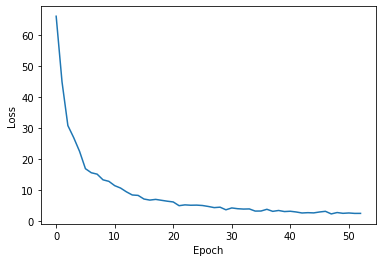

In [27]:
clf = sklearn.linear_model.SGDClassifier(loss='log', tol=1e-2, max_iter=1000, verbose=True)
with StdOutIntercept():
    clf.fit(x_train, y_train)

In [65]:
from parfit import bestFit 
from sklearn.metrics import roc_auc_score, accuracy_score
grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1],
    'loss': ['log'],
    'tol': [1e-3, 1e-2, 1e-1],
    'learning_rate': ['constant', 'optimal', 'adaptive'],
    'eta0': [1e-4, 1e-3, 1e-2],
    'n_iter_no_change': [5, 10, 20, 50, 100, 500],
    'shuffle': [True, False],
    'max_iter': [1000]
}
paramGrid = sklearn.model_selection.ParameterGrid(grid)
best_model, best_score, all_models, all_scores = bestFit(SGDClassifier, paramGrid, \
                                                         x_train, y_train, \
                                                         x_test, y_test, \
                                                         metric = accuracy_score, predict_proba=False, scoreLabel='ACC')


-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0070s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0341s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1284s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 126 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 424 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 560 tasks      | elapsed: 

-------------SCORING MODELS-------------
Too many dimensions to plot.


[Parallel(n_jobs=-1)]: Done 1172 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:    0.2s finished


In [63]:
print(best_model, best_score)

{'alpha': 0.0001, 'eta0': 0.001, 'learning_rate': 'adaptive', 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 10, 'shuffle': False, 'tol': 0.1} 0.866


Train accuracy: 0.86 
Test Accuracy 0.858


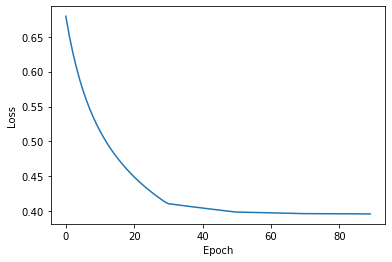

In [64]:
best_model = sklearn.linear_model.SGDClassifier(eta0=0.0001, learning_rate='adaptive', loss='log', \
                                                n_iter_no_change=20, tol=0.01, verbose=True)
with StdOutIntercept():
    best_model.fit(x_train, y_train)


print(f"Train accuracy: {best_model.score(x_train, y_train)} \nTest Accuracy {best_model.score(x_test, y_test)}")

In [66]:
best_model = sklearn.linear_model.SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log', \
                                                n_iter_no_change=50, tol=0.001, verbose=True)
with StdOutIntercept():
    best_model.fit(x_train, y_train)


print(f"Train accuracy: {best_model.score(x_train, y_train)} \nTest Accuracy {best_model.score(x_test, y_test)}")

Train accuracy: 0.896 
Test Accuracy 0.84


Train accuracy: 0.936 
Test Accuracy 0.758


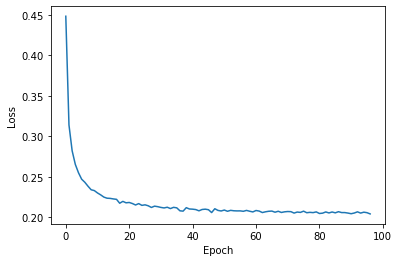

In [67]:
best_model = sklearn.linear_model.SGDClassifier(eta0=0.01, learning_rate='constant', loss='log', \
                                                n_iter_no_change=50, verbose=True)
with StdOutIntercept():
    best_model.fit(x_train, y_train)


print(f"Train accuracy: {best_model.score(x_train, y_train)} \nTest Accuracy {best_model.score(x_test, y_test)}")

Optimal configuration ensures highest test score, was achieved with this model
```
best_model = sklearn.linear_model.SGDClassifier(eta0=0.0001, learning_rate='adaptive', loss='log',
                                                n_iter_no_change=20, tol=0.01, verbose=True)
```
Other tested configs offered higher train accuracy, but lower test accuracy, indicating overfitting.